## Single linear regression - code along

EDA = Explorativ Data Analysis 

Används för att förutse ett värde på Y med hjälp av en variabel X. Vi antar att det finns ett approximativt linjärt förhållande mellan X och Y.

Formel: $\hat{Y} = \hat{\beta_0} + \hat{\beta_1} X$

$\hat{Y}$ = prediction of Y on the basis of X = x.

$\hat{\beta_0}$ = the intercept

$\hat{\beta_1}$ = the slope


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_path = "../Data/Advertising.csv"

adv = pd.read_csv(data_path, index_col= 0)

adv.head()



,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
adv.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
# Y is a response variable
Y = sales = adv["sales"]

# Antag att regression av "TV" på "sales" är ungefär linjär
# Y ≈ beta0 + beta1  * x 
# sales = beta0 + beta1 * "TV"
# Modellspecifikationsmatris (designmatris) behöver en 1:a i första kolumnen
# 1:a är med för i en matris-lösning så behövs den för att få med beta0 vid beräkning, annars hade beta0 vart 0. 

# Design matris
X = TV = np.column_stack([np.ones(Y.shape[0]), adv["TV"]])
X

array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
       [  1. ,   8.7],
       [  1. ,  57.5],
       [  1. , 120.2],
       [  1. ,   8.6],
       [  1. , 199.8],
       [  1. ,  66.1],
       [  1. , 214.7],
       [  1. ,  23.8],
       [  1. ,  97.5],
       [  1. , 204.1],
       [  1. , 195.4],
       [  1. ,  67.8],
       [  1. , 281.4],
       [  1. ,  69.2],
       [  1. , 147.3],
       [  1. , 218.4],
       [  1. , 237.4],
       [  1. ,  13.2],
       [  1. , 228.3],
       [  1. ,  62.3],
       [  1. , 262.9],
       [  1. , 142.9],
       [  1. , 240.1],
       [  1. , 248.8],
       [  1. ,  70.6],
       [  1. , 292.9],
       [  1. , 112.9],
       [  1. ,  97.2],
       [  1. , 265.6],
       [  1. ,  95.7],
       [  1. , 290.7],
       [  1. , 266.9],
       [  1. ,  74.7],
       [  1. ,  43.1],
       [  1. , 228. ],
       [  1. , 202.5],
       [  1. , 177. ],
       [  1. , 293.6],
       [  1

$\hat{\beta}$ = **b** = ($X^{1}$ X) $^{-1}$ $X^{T}$ y

In [5]:
# Pseudo-invers för prestanda
# The @ symbol is the matrix multiplication operator
# Får vi lutning på linjen(beta1) och vart den träffar y-axeln(beta0)

b = np.linalg.pinv(X.T @ X) @ X.T @Y

b

array([7.03259355, 0.04753664])

Efter regressionen får vi en skattare för y:

$\hat{y}$ = $\beta_{0}$ + $\beta_{1}$ * x

modellen är alltså = $\hat{y}$ = 7.03259355 + 0.04753664x - (y = kx + m)

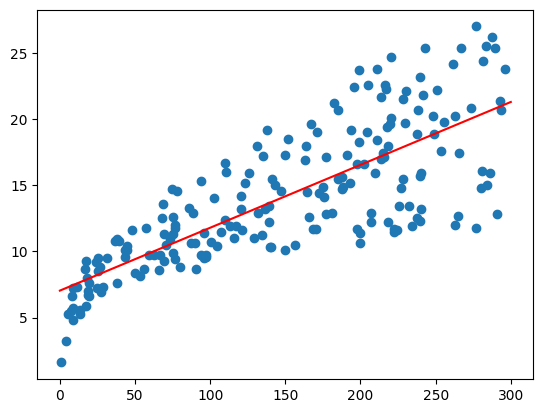

In [6]:
plt.scatter(X[:, 1], Y)
x = np.linspace(0, 300)
y_hat = b[0] + b[1]*x
plt.plot(x, y_hat, c= "red")

SSE = $\sum^n_{i=1} (y_{i} - \hat{y}_i)^2$
- Avståndet till datapunkterna från regressons linjen. Den ska vara så liten som möjligt.

In [7]:
# RSS Residual Sum of Squares
# SSE Sum of Square Errors
# Samma sak! ^
# Försöker minimera SSE med minsta kveadrat metoden

# n är sickprovs storleken
n = Y.shape[0]

# antalet parametrar, bara "TV" i detta fall, så 1, antalet variablar
v = X.shape[1] - 1

SSE = np.sum(np.square(Y - (X @ b)))

print (np.column_stack([Y, X]))




[[ 22.1   1.  230.1]
 [ 10.4   1.   44.5]
 [  9.3   1.   17.2]
 [ 18.5   1.  151.5]
 [ 12.9   1.  180.8]
 [  7.2   1.    8.7]
 [ 11.8   1.   57.5]
 [ 13.2   1.  120.2]
 [  4.8   1.    8.6]
 [ 10.6   1.  199.8]
 [  8.6   1.   66.1]
 [ 17.4   1.  214.7]
 [  9.2   1.   23.8]
 [  9.7   1.   97.5]
 [ 19.    1.  204.1]
 [ 22.4   1.  195.4]
 [ 12.5   1.   67.8]
 [ 24.4   1.  281.4]
 [ 11.3   1.   69.2]
 [ 14.6   1.  147.3]
 [ 18.    1.  218.4]
 [ 12.5   1.  237.4]
 [  5.6   1.   13.2]
 [ 15.5   1.  228.3]
 [  9.7   1.   62.3]
 [ 12.    1.  262.9]
 [ 15.    1.  142.9]
 [ 15.9   1.  240.1]
 [ 18.9   1.  248.8]
 [ 10.5   1.   70.6]
 [ 21.4   1.  292.9]
 [ 11.9   1.  112.9]
 [  9.6   1.   97.2]
 [ 17.4   1.  265.6]
 [  9.5   1.   95.7]
 [ 12.8   1.  290.7]
 [ 25.4   1.  266.9]
 [ 14.7   1.   74.7]
 [ 10.1   1.   43.1]
 [ 21.5   1.  228. ]
 [ 16.6   1.  202.5]
 [ 17.1   1.  177. ]
 [ 20.7   1.  293.6]
 [ 12.9   1.  206.9]
 [  8.5   1.   25.1]
 [ 14.9   1.  175.1]
 [ 10.6   1.   89.7]
 [ 23.2   1. 

SSR = $\sum_{i=1}^{n} (\hat{Y}_i ​− \overline{Y})^2$

- $\hat{Y}_i$ = Y i Regrissions linjen.
- $\overline{Y}$ = Mean av Y faktiska värde 

Variance = $\sigma^2 = \frac{1}{n} E[(\hat{Y} – E[\hat{Y}])^2]$


$\texttt{Cov}$(X,Y) = E[(X - $\mu_{x}$)(Y - $\mu_{y})] = E[XY]-E[X]E[Y]$

Är avvikelsen i det faktiska Y(beroende variablen) och X(oberoende variabel).  

$Syy​ = \sum^n_{i=1}​(y_i​ − \overline{y})^2$ och $Sxx​ = \sum^n_{i=1}​(x_i​ − \overline{x})^2$ 


$S_{xy} = \sum^n_{i=1} (X_i-\overline{x})(Y-\overline{y})$

Om X och Y är oberoende så är Cov(X, Y) = 0, men vi kan ine anta det omvända. Dvs Cov = 0 betyder inte nödvendigtvis att X eller Y är oberoende, men de är åtminstone inte linjärt.
Vi vill att alla X ska vara oberoende, men alla Y ska vara beroende. Så Cov variansen ska vara = 0 över alla X. Annars är har vi ingen linjär linje.  




Standardfel kring medlet: $Var(\hat{\sigma}) = SE(\hat{\sigma})^2 = \frac{\sigma^2}{n}$

In [13]:
# Detta är stickprovs variansen, inte populationen, Sigma^2
var = SSE/(n-v-1)

# Sigma, residual standard error, skrivs "S" i kod, även RSE
# Alltså en uppskattning av standardfelet
S = np.sqrt(var)

# Sum of Squares Regression, det fatiska felet mot regrissions linjen
SSR = np.sum(b*(X.T @ Y)) - (np.square(np.sum(Y))/n)

# Avvikelsen i y-vectorn, respons variablen, 
Syy = np.sum(np.square(Y)) - (np.square(np.sum(Y))/n)

# Avvikelsen i x-vectorn, 
Sxx = np.sum(np.square(X)) - (np.square(np.sum(X))/n)

# Avvikelsen för båda, Covariance or cross-product term
Sxy = (np.sum(X[:, 1] * Y) - (np.sum(X[:, 1])*np.sum(Y))/n)

# Standard error (of the mean), variasnen på stickprovets storlek
SE = var / n

# Squer of standard error of Beta-1, slope, lutningen på regrisson linjen
# = var/Sxx
se_b1 = var/Sxx

# Confidence interval on predictor Beta-1
ci_b1 = (b[1], 2*np.sqrt(se_b1))


print (f"Confidence interval on predictor Beta-1: {ci_b1[0]:.4f} -+ {ci_b1[1]:.4f}")


Confidence interval on predictor Beta-1: 0.0475 -+ 0.0055


Detta är väldigt ungefärligt intervall på 95% ($\sigma 2$). Om vi kör regrssionen många gånger på delmängden av data (som skall ha samma medel, dvs vara balanserad) så väntar vi oss att 95% av värden hamnar melllan 0.052 och 0.042 

In [38]:

#se_intercept = var * (1/n * (np.squer(np.mean(X)) / np.square((np.sum(X[:,1] - )))

# Standar error intercept 
x_mean = np.mean(X)
se_b0 = var * ((1/n)+(np.square(x_mean)/Sxx))
np.sqrt(se_b0)


np.float64(0.3072730307163512)

In [39]:
ci_b1 = (b[0], 2*np.sqrt(se_b0))
print(f"Confidence interval on predictor β0: {ci_b1[0]:.3f} ± {ci_b1[1]:.3f} interval: [{b[0]- ci_b1[1]:.3f}, {b[0]+ ci_b1[1]:.3f}]")


Confidence interval on predictor β0: 7.033 ± 0.615 interval: [6.418, 7.647]


### Hypotestestning
Noll-hypotes

$H_0$ : There is no relationshp between X and Y

Alternativ hypotes:

$H_a$ : There is relationshp between X and Y

$H_0$ : $\beta_1$ = 0

$H_a$ : $\beta_1 \neq$ 0

T-statistika för att testa relevans

\begin{equation*}
t = \frac{\hat{\beta_1} - \mathbb{0}}{SE(\hat{\beta_1})}
\end{equation*}

In [40]:
# Detta är kallas ett P värde
t = b[1]/se_b0
t

# t => antalet standard deviatoiner bort ett värde 0 för β1 skulle vara, om t=2 är det alltså 95% chans att det är korrekt. 
# Ett värde på 17 (dvs 17σ) motsvarar ett tal med 42 nollor efter decimalpunkten innan första signifikanta siffran.
# Detta värdet är rimligheten att den är med i distrubutionen. Är lutningen på regressions lijen 0, nej om det är stort värde. 

np.float64(6303.106346188207)

Ok, så regression är relvenat, men hur bra är den? 

$$\hat{\rho} = r = \frac{S_{xy}}{\sqrt{S_{xx}{S_{yy}}}}$$

En Starkare egenskap är korrelation (Perason coefficient of correlation), som är ett värde mellan -1 och 1 (inklusive ändpunkterna).
Låt $X$ och $Y$ vara slumpvariabler med medel $\overline{X}$ respektive $\overline{Y}$ samt varianser $\sigma_X^2$ och $\sigma_Y^2$. Korrelation mellan X och Y ges då av:

Om Personkoefficienten är 1 eller -1 (|$\rho_{XY}$| = 1) då har vi visat att det finns en ekvation : Y = $\beta_0 + \beta_1$ X

In [41]:
import scipy.stats as stats
rho = Sxy / (np.sqrt(Sxx*Syy))
Rsq = SSR/Syy
r = stats.pearsonr(X[:, 1], Y)
print(f"scipy.stats pearsonnr objekt: {r}")
print(f"scipy.stats korrelation: {r.correlation}\nsqrt(R²):\t\t {np.sqrt(Rsq)}\nR²:\t\t\t {Rsq}\nAlternativ R²: \t\t {1 - (SSE/Syy)}\nr²:                      {np.square(r.correlation)}\nBeräkning av r och R² i flera steg: {rho}, {rho**2}")

# Tänk på att datorer har begränsad möjlighet att vissa flyt tal. Det finns ett litet fel mellan talen.
# När man gör många oprationer på tal så blir felen större. Så viktigt att begränsa antalet oprationer på värdena. 
# R^2 vissar hur mycket av värdena täcks av regressions linjen = vilken significans har linjen. Så om värdet är högt, finns det stor linjär signifikans.

scipy.stats pearsonnr objekt: PearsonRResult(statistic=np.float64(0.7822244248616066), pvalue=np.float64(1.4673897001946247e-42))
scipy.stats korrelation: 0.7822244248616066
sqrt(R²):		 0.7822244248616381
R²:			 0.6118750508501205
Alternativ R²: 		 0.611875050850071
r²:                      0.6118750508500712
Beräkning av r och R² i flera steg: 0.7983953520754684, 0.6374351382157112
